## Examples of dirichlet_partition

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from dirichlet import dirichlet_partition

In [2]:
# A helper funtion that prints out a summary of a partition
def summarize_partition(partition):
    total_n=0
    for k,y in partition.items():
        _,counts=np.unique(y,return_counts=True)
        proportions=np.array2string(counts/len(y),formatter={'float': lambda x: f'{x:.2f}'})
        print(f'Client: {k} Counts: {counts} (total: {len(y)}) %: {proportions}')
        total_n+=len(y)
        
    print(f'Total samples: {total_n}')

In [3]:
# A helper function that plots the partition as a horizontal bar graph
def visualize_partition(partition,labels,title=None,legend=False):
    
    # Class -> array with no. of elements of class per client
    # E.g. 0 -> [100,200,300] implies client 0 has 100 class 0 examples and so on

    class_client_counts={label:[] for label in labels}
    
    clients=sorted(partition)
    sorted_values=[partition[i] for i in clients]

    for label in labels:
        counts_all=np.zeros(len(partition))
        for client,y in zip(clients,sorted_values):
            counts_all[client]=(y==label).sum()
        
        class_client_counts[label]=counts_all

    fig, ax = plt.subplots()
    prev=None
    for k,v in class_client_counts.items():
        ax.barh(clients, v,label=k,left=prev)
        if prev is None:
            prev=v
        else:
            prev+=v

    plt.title(title)
    plt.xlabel('# datapoints')
    plt.ylabel('Clients')
    if legend: plt.legend()
    plt.show()

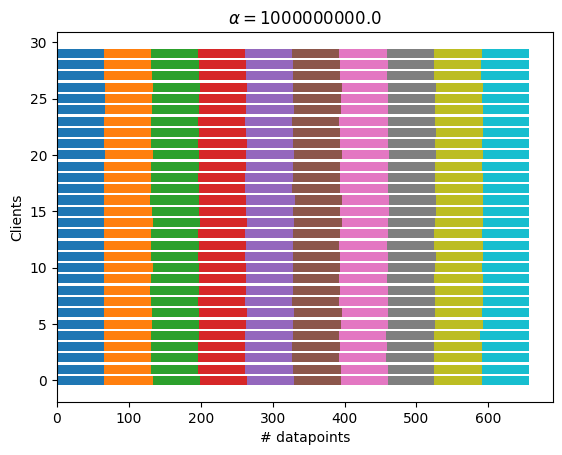

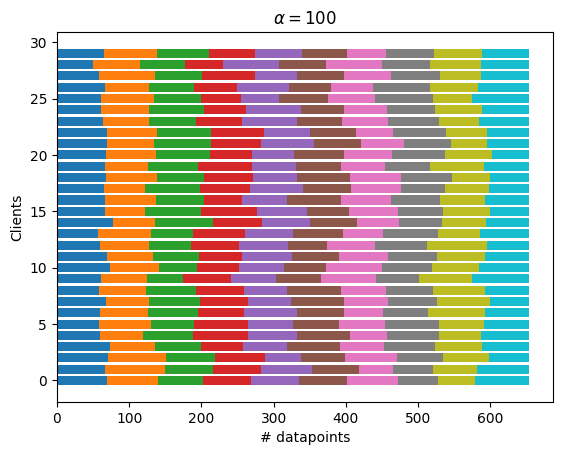

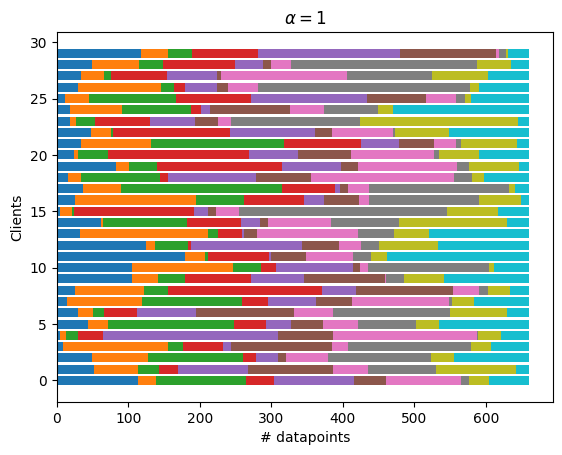

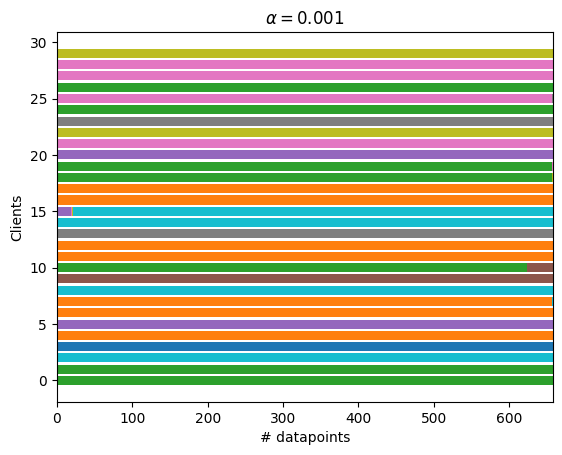

In [31]:
# We replicate the figure in the paper [1]
for alpha in [1e+9,100,1,0.001]:
    
    classes=list(range(10))

    # A class balanced y
    y=np.random.choice(classes,size=200000)

    # Partitioned among 5 clients/segments with a high alpha
    partition_ixs=dirichlet_partition(y,c_clients=30,alpha=alpha,debug=True)
    partition={c:y[ixs] for c,ixs in partition_ixs.items()}
    
    visualize_partition(partition,classes,title=r'$ \alpha = {'+str(alpha)+'} $')


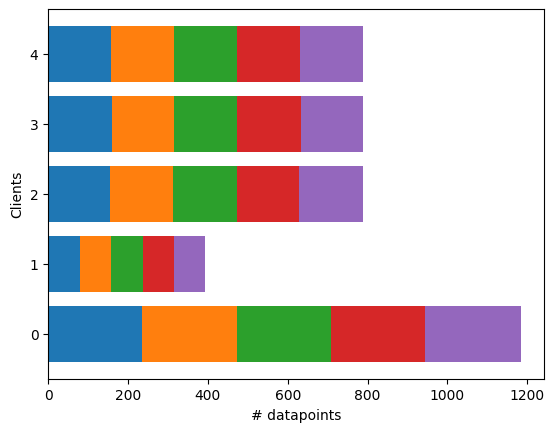

In [35]:
# An example with uneven n
classes=list(range(5))

# A class balanced y
y=np.random.choice(classes,size=20000)

# Partitioned among 5 clients/segments with a high alpha
partition_ixs=dirichlet_partition(y,c_clients=5,alpha=10000,n=[0.3, 0.1, 0.2, 0.2, 0.2])
partition={c:y[ixs] for c,ixs in partition_ixs.items()}

visualize_partition(partition,classes)

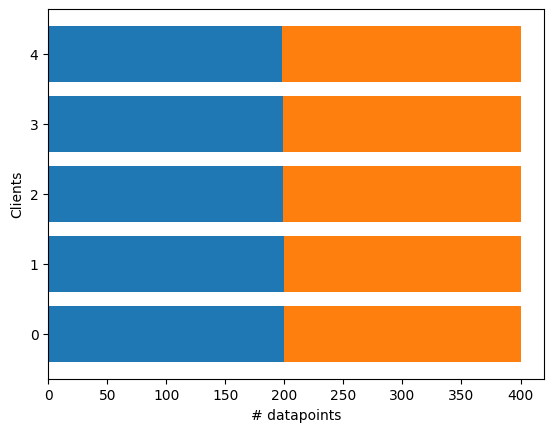

In [33]:
# An example dealing with uneven label distribution in y 

classes=list(range(2))

# A class un-balanced y
y=np.random.choice(classes,size=20000,p=[0.9,0.1])

# Partitioned among 5 clients/segments with a high alpha
partition_ixs=dirichlet_partition(y,c_clients=5,alpha=10000)
partition={c:y[ixs] for c,ixs in partition_ixs.items()}

# We are still able to guarantee the dist. given by alpha
visualize_partition(partition,classes)